In [ ]:
# !pip install earthengine-api
import ee
ee.Authenticate()

import numpy as np
import pandas as pd

import ee
ee.Initialize()

# Tensorflow setup.
import tensorflow as tf

tf.enable_eager_execution()
print(tf.__version__)

# Source of some the code here is 

https://developers.google.com/earth-engine/python_install-colab

In [0]:
# Initialize the library.
ee.Initialize()

In [0]:
import numpy as np
import tensorflow as tp
from IPython.display import Image
import folium
import matplotlib.pyplot as plt


In [0]:
# Test the API
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


In [0]:
# Import a DEM and display a thumbnail of it.
dem = ee.Image('USGS/SRTMGL1_003')

Image(url=dem.updateMask(dem.gt(0))
  .getThumbUrl({'min': 0, 'max': 4000, 'dimensions': 512,
                'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}))

In [ ]:
# Import libraries.
import ee
import folium

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Fetch an elevation model.
dem = ee.Image('USGS/SRTMGL1_003')
# Set visualization parameters.
vis_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}

# Create a folium map object.
my_map = folium.Map(location=[20, 0], zoom_start=3, height=300)

# Add the elevation model to the map object.
my_map.add_ee_layer(dem.updateMask(dem.gt(0)), vis_params, 'DEM')

# Add a layer control panel to the map.
my_map.add_child(folium.LayerControl())

# Display the map.
display(my_map)

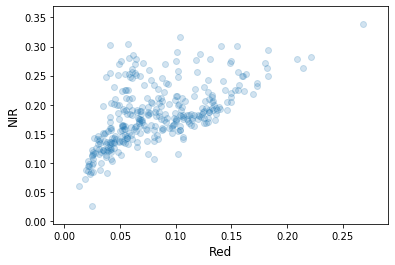

In [0]:
# Fetch a Landsat image.
img = ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')

# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()

# Functions
1.   In this section we will define the functions we need



In [0]:
############################################################################
#
#    define an object of parameters for whatever you want to do
#

class Parameters:
  def __init__(self, region_polygon, start_date, end_date, ndvi_bands= ['B4', 'B3']):
    self.region_polygon = region_polygon
    self.ndvi_bands = ndvi_bands
    self.start_date = start_date
    self.end_date = end_date

############################################################################
def addTime(image):
  time_added = image.addBands(image.metadata('system:time_start').divide(1000 * 60 * 60 * 24 * 365))
  return (time_added)

############################################################################
##
##    compute NDVI index
##

def compute_collection_NDVI(image_collection):
  collection_NVDI = image_collection.map(compute_image_NDVI)
  return (collection_NVDI)

def compute_image_NDVI(an_image, ndvi_bands=['B8', 'B4']):
  image_NDVI = an_image.normalizedDifference(ndvi_bands).rename('NDVI')
  return (image_NDVI)

############################################################################
##
##    add NDVI index to the image collection
##

def add_NDVI_to_image_collection(image_collection):
  return (image_collection.map(addNDVI))

def add_NDVI_to_image_to_use_for_map(image, ndvi_bands=['B8', 'B4']):
  ndvi = image.normalizedDifference(ndvi_bands).rename('NDVI');
  return image.addBands(ndvi)



# set up the image properties we want:
  - sentinel 2 and its bands
  - landsat and its bands (?)

# Example for downloading images of landsat:
[Link to the example](https://stackoverflow.com/questions/39219705/how-to-download-images-using-google-earth-engines-python-api/41289973#41289973)

  `llx = 116.2621`

  `lly = 39.8412`
  
  `urx = 116.4849`

  `ury = 40.01236`

`geometry = ee.Geometry.Rectangle([116.2621, 39.8412, 116.4849, 40.01236])`
`geometry = geometry['coordinates'][0]`

`task_config = {
    'description': 'imageToDriveExample',
    'scale': 30,  
    'region': geometry
    }`

`task = ee.batch.Export.image(landsat, 'exportExample', task_config)`

`task.start()`

In [0]:
sentinel2A_all_bands = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 
                        'AOT', 'WVP', 'SCL', 'TCI_R', 'TCI_G', 
                        'TCI_B', 'MSK_CLDPRB', 'MSK_SNWPRB', 
                        'QA10', 'QA20', 'QA60']
                        
RGB_bands = ['B4', 'B3', 'B2']
sentinel2A_some_bands = ['B4', 'B3', 'B2', 'SCL', 'AOT']

In [0]:
# Load a Sentinel 2 image and select three bands.
sentinel_2A = ee.Image('COPERNICUS/S2').select(sentinel2A_some_bands);

In [0]:
# Load a landsat image and select three bands.
landsat = ee.Image('LANDSAT/LC8_L1T_TOA/LC81230322014135LGN00').select(RGB_bands);

In [0]:
DDD = [[-119.79749473988022, 45.90439345934826],
       [-119.79766640125717, 45.90370660669838],
       [-119.79762348591294, 45.90254192408789],
       [-119.79697975574936, 45.901496675301104],
       [-119.79577812611069, 45.90072019203491],
       [-119.79423317371811, 45.90024235078123],
       [-119.7924307292601, 45.90012288982523],
       [-119.79075703083481, 45.900630597113086],
       [-119.78946957050766, 45.90152653982524],
       [-119.78882584034409, 45.90275097148382],
       [-119.78869709431137, 45.90391564970881],
       [-119.789169163098, 45.904811539409366],
       [-119.78985580860581, 45.90531920382207],
       [-119.79110035358872, 45.9058567257871],
       [-119.7920874065062, 45.90624493285829],
       [-119.79346069752182, 45.906334518719945],
       [-119.7946623271605, 45.90615534685204],
       [-119.79586395679917, 45.90567755237708],
       [ -119.79697975574936, 45.90496085295384], 
      [-119.79749473988022, 45.90439345934826]
]


DDD = [
       [-119.6407034633335, 46.24481372235483],
       [-119.6408917723115, 46.24488458019852],
       [-119.6410025340358, 46.24492625773868],
       [-119.6409025226398, 46.24509979439763],
       [-119.6403588110883, 46.24607095679298],
       [-119.6378330575554, 46.24505154496256],
       [-119.6378477085695, 46.24503421710987],
       [-119.6375762996203, 46.24492301512146],
       [-119.6378468749315, 46.24462749295479],
       [-119.6386649272333, 46.24406085261441], 
       [-119.6396165642001, 46.24437708363979], 
       [-119.6407034633335, 46.24481372235483]
]

In [0]:
a_double_crop_field_polygon = ee.Geometry.Polygon(DDD)

In [0]:
# a_double_crop_field_polygon["coordinates"][0]

In [0]:
len(a_double_crop_field_polygon["coordinates"][0])

12

In [0]:
# print(a_double_crop_field_polygon)

In [0]:
# we need to work on the following to get the damn images
a_double_crop_field_image_collection = ee.ImageCollection('COPERNICUS/S2')

In [0]:
start_date = '2018-03-1'
end_date = '2018-10-30'
a_double_crop_field_image_collection = ee.ImageCollection('COPERNICUS/S2').filter( # searches all sentinel 2 imagery pixels...
                                                      ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 
                                                                   10)).filterDate( start_date,
                                                                                    end_date).filterBounds(
                                                                                                  a_double_crop_field_polygon)

a_double_crop_field_image_collection

In [0]:
count = a_double_crop_field_image_collection.size()
print('Count: ', str(count.getInfo())+'\n')

Count:  45



In [0]:
!pip install geetools
from geetools import batch

     |████████████████████████████████| 81kB 2.9MB/s 
     |████████████████████████████████| 225kB 10.1MB/s 
  Created wheel for geetools: filename=geetools-0.4.13-cp36-none-any.whl size=96146 sha256=0d9d2cac83964279c29ddde642e7922f84c21bab8e19224d424eb5155432c008
  Stored in directory: /root/.cache/pip/wheels/02/89/a3/1cceb1525740f73dd5caa9e09cb8821f1113881ca84832fee6
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32607 sha256=7f9e184f3d09ea72a91eaffebca9d10f7cf7bf68989ea3ae8f33a321b780147f
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built geetools pyshp


In [0]:
tasklist = batch.ImageCollection.toDrive(a_double_crop_field_image_collection, folder='Sentinel_Images_off_EE', scale=10)

AttributeError: ignored

In [0]:
# Export to drive
"""
# 
# Matt Pruet from Java

Export.table.toDrive({

  collection: a_double_crop_field_image_collection,

  description: 'a_double_crop_field_image_collection',

  fileFormat: 'CSV'

});
"""

"\n# \n# Matt Pruet from Java\n\nExport.table.toDrive({\n\n  collection: a_double_crop_field_image_collection,\n\n  description: 'a_double_crop_field_image_collection',\n\n  fileFormat: 'CSV'\n\n});\n"

In [0]:
list_of_images = a_double_crop_field_image_collection.toList(10)
print (list_of_images.getInfo())

[{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [1830, 1830], 'crs': 'EPSG:32610', 'crs_transform': [60, 0, 699960, 0, -60, 5100000]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32610', 'crs_transform': [10, 0, 699960, 0, -10, 5100000]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32610', 'crs_transform': [10, 0, 699960, 0, -10, 5100000]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [10980, 10980], 'crs': 'EPSG:32610', 'crs_transform': [10, 0, 699960, 0, -10, 5100000]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': 0, 'max': 65535}, 'dimensions': [5490, 5490], 'crs': 'EPSG:32610', 'crs_transform': [20, 0, 699960, 0, -20, 510000

In [0]:
# This will not work, since an image collection -collection in time- is being exported.
# An image to be exported need to be single image. So, either a median should be taken over time, or
# a single snapshot in time needs to be saved.

myScale = 50

task = ee.batch.Export.image.toDrive(image=a_double_crop_field_image_collection,
                                     region = a_double_crop_field_polygon.getInfo()['coordinates'],
                                     description='a_double_crop_field_RGB_SCL_AOT',
                                     folder='Sentinel_Images_off_EE',
                                     # fileNamePrefix='myFilePrefix',
                                     # crs = myCRS
                                     maxPixels= 1e9,
                                     scale=myScale)
task.start()
task.status()

{'creation_timestamp_ms': 1579046515697,
 'description': 'a_double_crop_field_RGB_SCL_AOT',
 'id': 'CI7W4OFOI7FQNS6IK56RSB2C',
 'name': 'projects/earthengine-legacy/operations/CI7W4OFOI7FQNS6IK56RSB2C',
 'start_timestamp_ms': 0,
 'state': 'READY',
 'task_type': 'EXPORT_IMAGE',
 'update_timestamp_ms': 1579046515697}

In [0]:
double_crop_NDVI = compute_collection_NDVI(a_double_crop_field_image_collection)

# information about image collection double_crop_NDVI

In [0]:
print (type(double_crop_NDVI.size()))
print ("type of double_crop_NDVI is: " + str(type(double_crop_NDVI)))
# print ("double_crop_NDVI collection size is " + str(double_crop_NDVI.size()))

<class 'ee.ee_number.Number'>
type of double_crop_NDVI is: <class 'ee.imagecollection.ImageCollection'>


In [0]:
double_crop_NDVI_band = double_crop_NDVI.select(['NDVI'])

# The following takes median over time. We want to take median over space.
double_crop_NDVI_band_reduced = double_crop_NDVI_band.median()

In [0]:
bandNames = double_crop_NDVI_band_reduced.bandNames()

print (bandNames.getInfo())
print (type(double_crop_NDVI_band_reduced))
print (type(double_crop_NDVI_band))

['NDVI']
<class 'ee.image.Image'>
<class 'ee.imagecollection.ImageCollection'>


In [0]:
count = double_crop_NDVI_band.size()
print('Count: ', str(count.getInfo())+'\n')

Count:  48



In [0]:
type(double_crop_NDVI_band)

ee.imagecollection.ImageCollection

Count:  9



In [0]:
DDD = [[-119.79749473988022, 45.90439345934826],
       [-119.79766640125717, 45.90370660669838],
       [-119.79762348591294, 45.90254192408789],
       [-119.79697975574936, 45.901496675301104],
       [-119.79577812611069, 45.90072019203491],
       [-119.79423317371811, 45.90024235078123],
       [-119.7924307292601, 45.90012288982523],
       [-119.79075703083481, 45.900630597113086],
       [-119.78946957050766, 45.90152653982524],
       [-119.78882584034409, 45.90275097148382],
       [-119.78869709431137, 45.90391564970881],
       [-119.789169163098, 45.904811539409366],
       [-119.78985580860581, 45.90531920382207],
       [-119.79110035358872, 45.9058567257871],
       [-119.7920874065062, 45.90624493285829],
       [-119.79346069752182, 45.906334518719945],
       [-119.7946623271605, 45.90615534685204],
       [-119.79586395679917, 45.90567755237708],
       [ -119.79697975574936, 45.90496085295384], 
      [-119.79749473988022, 45.90439345934826]
]

In [0]:
type(DDD[0])

list

In [0]:
# x = np.array([get_date(d['id']) for d in double_crop_NDVI]) # throws an error: 'ImageCollection' object is not iterable 